In [3]:
# Add module to path
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [14]:
# Imports
from aoc23.utils import read_input
import networkx as nx
import numpy as np

In [5]:
input_25 = read_input(25)

## Part 1

The [Christmas Day puzzle](https://adventofcode.com/2023/day/25) is here! We are given an adjacency list for a large number of nodes, describing the ways in which the nodes are connected together by wires. This defines a graph, which we are told has a [minimum cut](https://en.wikipedia.org/wiki/Minimum_cut) with only three crossing edges (these represent 3 wires that, when cut, divide the nodes into two unconnected components). Let's start by using the `networkx` graph manipulation package to convert the example adjacency list and the full adjacency list into `networkx.Graph` objects:

In [6]:
def process_input(input_list):
    g = nx.Graph()
    
    # Define and add all the edges from each line
    for line in input_list:
        node1, conns = line.split(': ')
        for conn in conns.split():
            g.add_edge(node1, conn, name=f'{node1} -> {conn}')
            
    return g

In [7]:
test_input = [
    'jqt: rhn xhk nvd',
    'rsh: frs pzl lsr',
    'xhk: hfx',
    'cmg: qnr nvd lhk bvb',
    'rhn: xhk bvb hfx',
    'bvb: xhk hfx',
    'pzl: lsr hfx nvd',
    'qnr: nvd',
    'ntq: jqt hfx bvb xhk',
    'nvd: lhk',
    'lsr: lhk',
    'rzs: qnr cmg lsr rsh',
    'frs: qnr lhk lsr'
]

In [8]:
test_graph = process_input(test_input)
graph = process_input(input_25)

As this is Christmas Day, we can try to avoid some work by seeing if there is an easy way to spot the min-cut edges with a visualization:

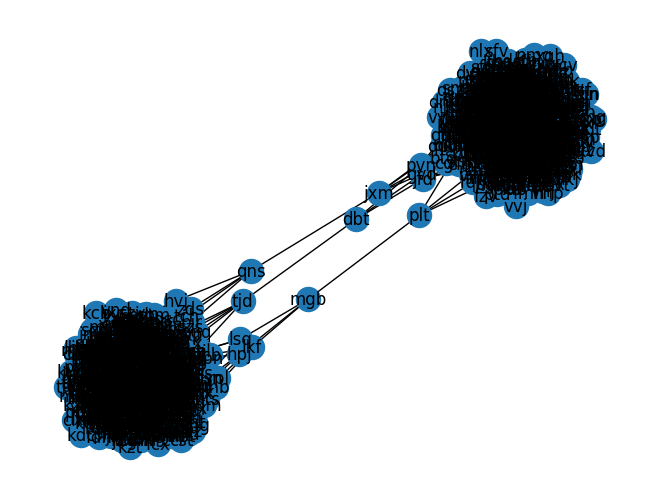

In [9]:
nx.draw(graph, with_labels=True,
        pos=nx.spring_layout(graph, weight=None, iterations=200))

Fortunately, we can see the three edges connecting the two clusters quite clearly! By inspection, reading off the node names and removing the associated edges:

In [10]:
graph.remove_edge('tjd', 'dbt')
graph.remove_edge('jxm', 'qns')
graph.remove_edge('plt', 'mgb')

And just to check, re-visualize the graph to see if the nodes are now partitioned into unconnected clusters:

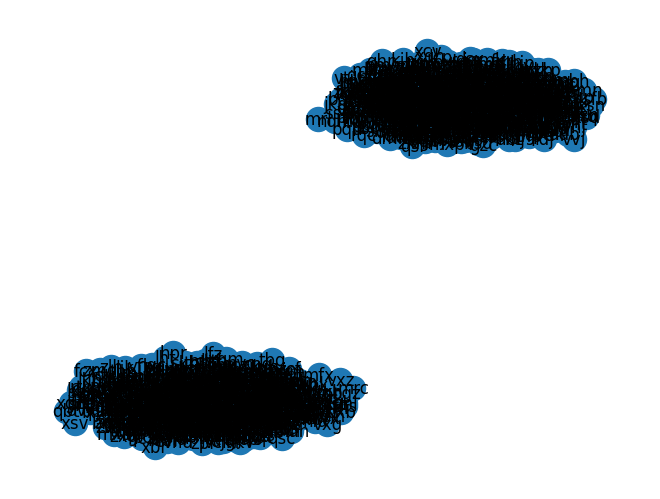

In [11]:
nx.draw(graph, with_labels=True,
        pos=nx.spring_layout(graph, weight=None, iterations=200))

Great! `networkx` has a method called `connected_components` which will determines the sizes of each of these clusters:

In [20]:
conn = nx.connected_components(graph)
sizes = [len(c) for c in conn]
print(f'Connected component sizes: {sizes}')

Connected component sizes: [752, 730]


In [21]:
np.prod(sizes)

548960

So the answer to part 1 is: __548960__.

We were fortunate in this case that visualization the graph was sufficient to find the three min-cut edges - if this were not the case, there is a method called the [Stoer Wagner algorithm](https://en.wikipedia.org/wiki/Stoer%E2%80%93Wagner_algorithm) which finds the minimum-cut in polynomial time (in the number of vertices); luckily, the `networkx` package has this available out of the box:

In [24]:
test_cut_value, test_partition = nx.stoer_wagner(test_graph)

In [29]:
assert test_cut_value == 3
test_partition

(['lhk', 'cmg', 'rsh', 'rzs', 'pzl', 'frs', 'lsr', 'qnr', 'nvd'],
 ['bvb', 'ntq', 'hfx', 'xhk', 'rhn', 'jqt'])

This matches exactly what was expected for the provided example - let's repeat for the full graph (first, re-ininitialise so it has the full set of edges):

In [33]:
graph = process_input(input_25)
cut_value, partition = nx.stoer_wagner(graph)

Now, we should be able to reproduce the correct partition component sizes, and the final answer:

In [34]:
assert cut_value == 3
np.prod([len(p) for p in partition])

548960

## Part 2

The second part of this puzzle only asks us to provide all 49 stars from the first 24 days, plus part 1 from today - this gives us the final star, and completes the Advent of Code 2023!